## Spatial Data Analysis Code-Along

> Author: Matt Brems

### Install packages if you haven't already:

In [10]:
!pip install pysal
!pip install palettable
!pip install folium

^C
^C
^C


A common package that is used to do spatial data analysis/exploration is [geopandas](http://geopandas.org/). However, there are a lot of weird dependencies that may give people trouble, so we'll avoid using geopandas today. There's a separate notebook that'll allow you to do some work in it if you want to test it out!
- I recommend that you set up an environment to do this if you want to try out geopandas.

In [19]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import *
import statsmodels.api as sm

%matplotlib inline

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Tresha\anaconda3\python.exe' 'C:\Users\Tresha\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\Tresha\AppData\Local\Temp\tmpx0sn28w4'
       cwd: C:\Users\Tresha\AppData\Local\Temp\pip-install-y__crgtd\rasterio
  Complete output (2 lines):
  INFO:root:Building on Windows requires extra options to setup.py to locate needed GDAL files. More information is available in the README.
  ERROR: A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
  ----------------------------------------
ERROR: Command errored out with exit status 1: 'C:\Users\Tresha\anaconda3\python.exe' 'C:\Users\Tresha\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\Tresha\AppData\Local\Temp\tmpx0sn28w4' Check the logs for full command output.


  Using cached pysal-2.4.0.tar.gz (20 kB)
  Using cached libpysal-4.4.0-py3-none-any.whl (2.4 MB)
  Using cached access-1.1.3-py3-none-any.whl (21 kB)
  Using cached esda-2.3.6-py3-none-any.whl (102 kB)
  Using cached giddy-2.3.3-py3-none-any.whl (60 kB)
  Using cached inequality-1.0.0.tar.gz (11 kB)
  Using cached pointpats-2.2.0.tar.gz (55 kB)
  Using cached segregation-1.5.0-py3-none-any.whl (82 kB)
  Using cached spaghetti-1.5.6-py3-none-any.whl (43 kB)
  Using cached mgwr-2.1.2.tar.gz (41 kB)
  Using cached spglm-1.0.8.tar.gz (37 kB)
  Using cached spint-1.0.7.tar.gz (28 kB)
  Using cached spreg-1.2.2-py3-none-any.whl (209 kB)
  Using cached spvcm-0.3.0.tar.gz (5.7 MB)
  Using cached tobler-0.7.0-py3-none-any.whl (26 kB)
  Using cached mapclassify-2.4.2-py3-none-any.whl (38 kB)
  Using cached splot-1.1.3.tar.gz (34 kB)
  Using cached spopt-0.1.1-py3-none-any.whl (54 kB)
  Using cached urllib3-1.26.5-py2.py3-none-any.whl (138 kB)
  Using cached python_dateutil-2.8.0-py2.py3-none-an

### First, we'll read in the shapefile and explore it a bit.

> A shapefile is a **file** that can hold the **shape** of an object. More technically, it is type of file that more easily contains the boundaries of objects and attributes of objects (i.e. the center of the object, the geographic location of the object if that exists) and it interfaces well with various programs.

In [20]:
shp_link = '../us48_data/us48.shp'

In [9]:
conda install -c conda-forge pysal

^C

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pysal.lib.io

C:\Users\Tresha\anaconda3\lib\site-packages\pysal\lib\weights\util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')


In [ ]:
# import pysal.lib as lib

# io = lib.io

In [22]:
us = pysal.lib.io.open(shp_link)

In [23]:
us

#### Let's check out the header.

In [24]:
us.header

{'File Code': 9994,
 'Unused0': 0,
 'Unused1': 0,
 'Unused2': 0,
 'Unused3': 0,
 'Unused4': 0,
 'File Length': 93238,
 'Version': 1000,
 'Shape Type': 5,
 'BBOX Xmin': -124.7314224243164,
 'BBOX Ymin': 24.95596694946289,
 'BBOX Xmax': -66.9698486328125,
 'BBOX Ymax': 49.371734619140625,
 'BBOX Zmin': 3.754550197104843e+72,
 'BBOX Zmax': 0.0,
 'BBOX Mmin': 0.0,
 'BBOX Mmax': 0.0}

In [ ]:
# 3 dimensional coordinates

> The **BBOX** refers to a "bounding box," which is basically the box you'd create if you were to click and drag the smallest possible rectangle over a shape that contains the entire shape.

In [25]:
list(us)

#### Let's check out one individual observation - in this case, it'll be a U.S. state.

In [26]:
us[0]

#### There are plenty of [attributes that a polygon can have](http://pysal.readthedocs.io/en/latest/library/cg/shapes.html#pysal.cg.shapes.Polygon).

In [27]:
us[0].vertices

[(-122.40074920654297, 48.22539520263672),
 (-122.46158599853516, 48.22854232788086),
 (-122.45315551757812, 48.1286735534668),
 (-122.36007690429688, 48.060279846191406),
 (-122.51324462890625, 48.1341552734375),
 (-122.54080200195312, 48.21063995361328),
 (-122.50785827636719, 48.253971099853516),
 (-122.40313720703125, 48.24677276611328),
 (-122.3770523071289, 48.28989791870117),
 (-122.5630874633789, 48.41442108154297),
 (-122.6657485961914, 48.41307067871094),
 (-122.69812774658203, 48.494503021240234),
 (-122.60689544677734, 48.51899719238281),
 (-122.5219497680664, 48.45857620239258),
 (-122.4725570678711, 48.46236801147461),
 (-122.50402069091797, 48.55961608886719),
 (-122.42826843261719, 48.59956741333008),
 (-122.48651885986328, 48.63874053955078),
 (-122.52527618408203, 48.71189498901367),
 (-122.51557159423828, 48.75809097290039),
 (-122.69611358642578, 48.803184509277344),
 (-122.7529525756836, 48.91015625),
 (-122.82112884521484, 48.95089340209961),
 (-122.7426528930664,

In [28]:
us[0].centroid

(-120.42689103452584, 47.376901373520255)

In [29]:
print("Left: " + str(us[0].bounding_box.left))
print("Right: " + str(us[0].bounding_box.right))
print("Upper: " + str(us[0].bounding_box.upper))
print("Lower: " + str(us[0].bounding_box.lower))

Left: -124.7314224243164
Right: -116.91815185546875
Upper: 49.000003814697266
Lower: 45.543251037597656


In [30]:
us[0].bounding_box.right - us[0].bounding_box.left

7.813270568847656

In [31]:
us[0].bounding_box.upper - us[0].bounding_box.lower

3.4567527770996094

In [32]:
(us[0].bounding_box.right - us[0].bounding_box.left) * (us[0].bounding_box.upper - us[0].bounding_box.lower)

27.00854473709478

In [33]:
us[0].area

20.74983112933114

In [34]:
us[0].contains_point((-120, 47))

True

In [35]:
us[0].contains_point((-120, 57))

False

#### Thanks to Tucker Allen (DSI-US-3 grad from NYC) for the following code allowing you to visualize states by their vertices of the shapefile:

(24.95596694946289, 49.371734619140625)

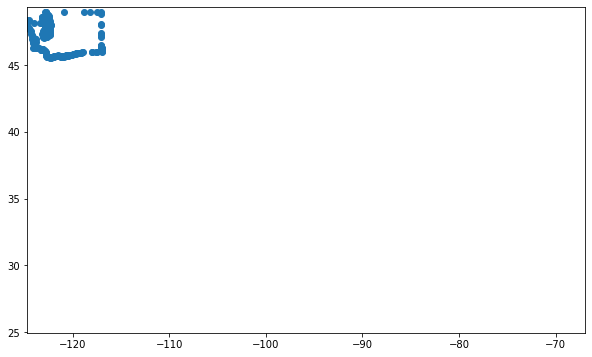

In [36]:
x = []
y = []
for i in us[0].vertices: # Change index of us (0-47) to see vertices' points
    x.append(i[0])
    y.append(i[1])
fig, ax = matplotlib.pyplot.subplots(figsize=(10,6))
matplotlib.pyplot.scatter(x, y)
matplotlib.pyplot.xlim(us.header['BBOX Xmin'] , us.header['BBOX Xmax']) # limits of U.S.
matplotlib.pyplot.ylim(us.header['BBOX Ymin'] , us.header['BBOX Ymax']) # limits of U.S.

(24.95596694946289, 49.371734619140625)

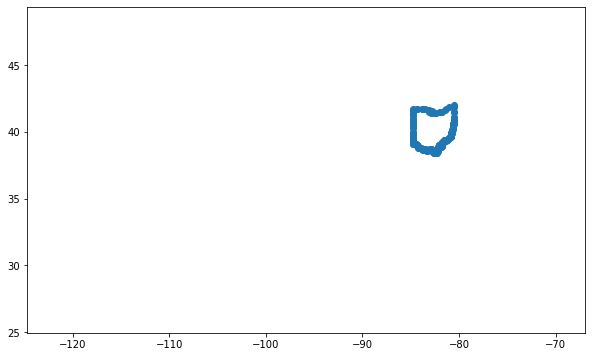

In [37]:
x = []
y = []
for i in us[24].vertices: # Change index of us (0-47) to see vertices' points
    x.append(i[0])
    y.append(i[1])
fig, ax = matplotlib.pyplot.subplots(figsize=(10,6))
matplotlib.pyplot.scatter(x, y)
matplotlib.pyplot.xlim(us.header['BBOX Xmin'] , us.header['BBOX Xmax']) # limits of U.S.
matplotlib.pyplot.ylim(us.header['BBOX Ymin'] , us.header['BBOX Ymax']) # limits of U.S.

(24.95596694946289, 49.371734619140625)

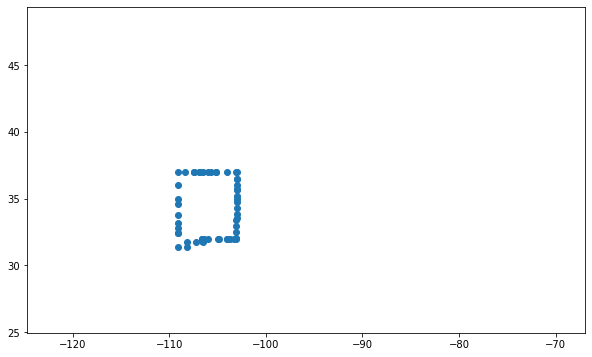

In [38]:
x = []
y = []
for i in us[39].vertices: # Change index of us (0-47) to see vertices points
    x.append(i[0])
    y.append(i[1])
fig, ax = matplotlib.pyplot.subplots(figsize=(10,6))
matplotlib.pyplot.scatter(x, y)
matplotlib.pyplot.xlim(us.header['BBOX Xmin'] , us.header['BBOX Xmax']) # limits of U.S.
matplotlib.pyplot.ylim(us.header['BBOX Ymin'] , us.header['BBOX Ymax']) # limits of U.S.

#### Let's read in weights and see what they look like.

> Weights will often be given to you, but sometimes you may need to specify weights. Below, we'll see how a tuple and dictionary are used to store the weights. The first value in the tuple refers to the specific observation/area; the second value in the tuple provides the dictionary of connected areas and the associated weights.

In [39]:
w = pysal.lib.io.open('../us48_data/states48.gal').read()

In [40]:
w

In [41]:
for i in w:
    print(i)

('0', {'7': 1.0, '8': 1.0, '21': 1.0, '39': 1.0})
('1', {'3': 1.0, '4': 1.0, '25': 1.0, '28': 1.0, '41': 1.0})
('2', {'15': 1.0, '21': 1.0, '22': 1.0, '33': 1.0, '39': 1.0, '40': 1.0})
('3', {'1': 1.0, '25': 1.0, '34': 1.0})
('4', {'1': 1.0, '13': 1.0, '24': 1.0, '28': 1.0, '33': 1.0, '41': 1.0, '47': 1.0})
('5', {'18': 1.0, '29': 1.0, '36': 1.0})
('6', {'17': 1.0, '27': 1.0, '35': 1.0})
('7', {'0': 1.0, '8': 1.0})
('8', {'0': 1.0, '7': 1.0, '30': 1.0, '37': 1.0, '39': 1.0})
('9', {'23': 1.0, '25': 1.0, '34': 1.0, '41': 1.0, '44': 1.0, '47': 1.0})
('10', {'11': 1.0, '12': 1.0, '14': 1.0, '22': 1.0, '46': 1.0})
('11', {'10': 1.0, '14': 1.0, '19': 1.0, '32': 1.0})
('12', {'10': 1.0, '20': 1.0, '22': 1.0, '24': 1.0, '38': 1.0, '46': 1.0})
('13', {'4': 1.0, '22': 1.0, '24': 1.0, '33': 1.0})
('14', {'10': 1.0, '11': 1.0, '22': 1.0, '32': 1.0, '39': 1.0, '43': 1.0, '45': 1.0})
('15', {'2': 1.0, '21': 1.0, '40': 1.0})
('16', {'26': 1.0})
('17', {'6': 1.0, '35': 1.0, '43': 1.0, '45': 1.0})
('1

#### We detect if spatial dependence exists using Moran's I, a permutation test.

In [42]:
import pysal.explore

In [43]:
y = np.array(pysal.lib.io.open('../us48_data/usjoin.csv').by_col('2009'))

In [44]:
moran_i = pysal.explore.esda.Moran(y,
                                   w,
                                   two_tailed = True,
                                   permutations = 1000)

In [45]:
moran_i.I # observed Moran's I statistic

0.4287689505041785

Remember that -1 indicates a perfect negative relationship (chessboard) and +1 indicates perfect positive spatial relationship (two sides that were perfectly aligned color-wise).

In [46]:
moran_i.z_sim # z-score

4.758048389432108

In [47]:
moran_i.p_sim # p-value

0.000999000999000999

Given our small $p$-value, we reject $H_0$ of no spatial association! Thus, **there is significant evidence to suggest that there is some spatial relationship in this 2009 median income data**.
> Note that we're not saying that the only influence on income is spatial. (That would be silly.) We're simply saying that, in looking at how our data are spatially organized, there appears to be some effect of space on median income in 2009.

#### Let's build a model taking space into account!

In [48]:
y

array([32274, 32077, 31493, 40902, 40093, 52736, 40135, 36565, 33086,
       30987, 40933, 33174, 35983, 37036, 31250, 35151, 35268, 47159,
       49590, 34280, 40920, 29318, 35106, 32699, 37057, 38009, 41882,
       48123, 32197, 46844, 33564, 38672, 35018, 33708, 35210, 38827,
       41283, 30835, 36499, 33512, 35674, 30107, 36752, 43211, 40619,
       31843, 35676, 42504])

In [49]:
X = np.array(pysal.lib.io.open('../us48_data/usjoin.csv').by_col('2008'))

In [50]:
X = sm.add_constant(X)

In [51]:
X

array([[1.0000e+00, 3.2819e+04],
       [1.0000e+00, 3.3445e+04],
       [1.0000e+00, 3.1800e+04],
       [1.0000e+00, 4.2377e+04],
       [1.0000e+00, 4.1719e+04],
       [1.0000e+00, 5.4528e+04],
       [1.0000e+00, 4.0698e+04],
       [1.0000e+00, 3.7808e+04],
       [1.0000e+00, 3.4127e+04],
       [1.0000e+00, 3.2322e+04],
       [1.0000e+00, 4.2049e+04],
       [1.0000e+00, 3.3978e+04],
       [1.0000e+00, 3.6726e+04],
       [1.0000e+00, 3.7983e+04],
       [1.0000e+00, 3.1302e+04],
       [1.0000e+00, 3.5730e+04],
       [1.0000e+00, 3.4906e+04],
       [1.0000e+00, 4.7040e+04],
       [1.0000e+00, 5.0607e+04],
       [1.0000e+00, 3.5215e+04],
       [1.0000e+00, 4.2299e+04],
       [1.0000e+00, 2.9591e+04],
       [1.0000e+00, 3.5775e+04],
       [1.0000e+00, 3.3293e+04],
       [1.0000e+00, 3.8128e+04],
       [1.0000e+00, 4.0332e+04],
       [1.0000e+00, 4.2461e+04],
       [1.0000e+00, 4.9233e+04],
       [1.0000e+00, 3.2585e+04],
       [1.0000e+00, 4.8692e+04],
       [1.

In [52]:
non_spatial_lm = sm.OLS(y, X).fit()

In [53]:
non_spatial_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     3939.
Date:                Thu, 27 May 2021   Prob (F-statistic):           3.20e-46
Time:                        15:45:24   Log-Likelihood:                -373.17
No. Observations:                  48   AIC:                             750.3
Df Residuals:                      46   BIC:                             754.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        910.7424    584.517      1.558      0.126    -265.829    2087.314
x1             0.9539      0.015     62.758      0.000       0.923       0.984
==============================================================================
Omnibus:                        1.239   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.497
Skew:                          -0.098   Prob(JB):                        0.780
Kurtosis:                       3.459   Cond. No.                     2.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
X = np.array(pysal.lib.io.open('../us48_data/usjoin.csv').by_col('2008'))

In [55]:
y.resize(len(y), 1)

In [56]:
X.resize(len(X), 1)

In [57]:
y.shape, X.shape

((48, 1), (48, 1))

In [58]:
import pysal.model.spreg

In [59]:
spatial_lm = pysal.model.spreg.OLS(y, X, w = None)

In [60]:
print(spatial_lm.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:          48
Mean dependent var  :  37205.0208                Number of Variables   :           2
S.D. dependent var  :   5414.4485                Degrees of Freedom    :          46
R-squared           :      0.9885
Adjusted R-squared  :      0.9882
Sum squared residual:15906822.633                F-statistic           :   3938.5630
Sigma-square        :  345800.492                Prob(F-statistic)     :   3.201e-46
S.E. of regression  :     588.048                Log likelihood        :    -373.174
Sigma-square ML     :  331392.138                Akaike info criterion :     750.349
S.E of regression ML:    575.6667                Schwarz criterion     :     754.091

-----------------------------------------------------------------------------

In [61]:
spatial_lm_weights = pysal.model.spreg.OLS(y,
                                  X,
                                  w = w,
                                  spat_diag = True,
                                  moran = True)

In [62]:
print(spatial_lm_weights.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          48
Mean dependent var  :  37205.0208                Number of Variables   :           2
S.D. dependent var  :   5414.4485                Degrees of Freedom    :          46
R-squared           :      0.9885
Adjusted R-squared  :      0.9882
Sum squared residual:15906822.633                F-statistic           :   3938.5630
Sigma-square        :  345800.492                Prob(F-statistic)     :   3.201e-46
S.E. of regression  :     588.048                Log likelihood        :    -373.174
Sigma-square ML     :  331392.138                Akaike info criterion :     750.349
S.E of regression ML:    575.6667                Schwarz criterion     :     754.091

-----------------------------------------------------------------------------

In [63]:
spatial_lm_weights = pysal.model.spreg.GM_Lag(y, X, w = w, spat_diag = True)

TypeError: No loop matching the specified signature and casting was found for ufunc add

In [ ]:
print(spatial_lm_weights.summary)

Spatial Auto-regressive Model:
$$
Y_i = \beta_0 + \rho \sum_{j} W_{ij}Y_j
$$

The model we fit:
$$
Y_i = \beta_0 + \beta_1[\text{2008 income}]_i + \rho \sum_{j} W_{ij}Y_j
$$

### Suppose want to generate our own weights!

In [64]:
import pysal.lib

In [65]:
wt = pysal.lib.weights.DistanceBand.from_shapefile("../us48_data/us48.shp", # name of shapefile
                                 threshold=10, # units to search
                                 binary=True) # 1/0 weights or distance-based weights

In [66]:
list(wt)

[(0, {7: 1.0, 10: 1.0, 21: 1.0}),
 (1, {3: 1.0, 4: 1.0, 5: 1.0, 7: 1.0, 22: 1.0, 29: 1.0}),
 (2,
  {8: 1.0,
   11: 1.0,
   13: 1.0,
   15: 1.0,
   16: 1.0,
   17: 1.0,
   18: 1.0,
   19: 1.0,
   26: 1.0,
   28: 1.0}),
 (3, {1: 1.0, 4: 1.0, 5: 1.0, 9: 1.0, 12: 1.0, 14: 1.0, 29: 1.0, 31: 1.0}),
 (4,
  {1: 1.0,
   3: 1.0,
   5: 1.0,
   9: 1.0,
   12: 1.0,
   14: 1.0,
   29: 1.0,
   31: 1.0,
   33: 1.0,
   35: 1.0}),
 (5,
  {1: 1.0,
   3: 1.0,
   4: 1.0,
   7: 1.0,
   14: 1.0,
   21: 1.0,
   22: 1.0,
   29: 1.0,
   34: 1.0,
   39: 1.0}),
 (6,
  {9: 1.0,
   12: 1.0,
   20: 1.0,
   24: 1.0,
   25: 1.0,
   30: 1.0,
   33: 1.0,
   37: 1.0,
   47: 1.0}),
 (7, {0: 1.0, 1: 1.0, 5: 1.0, 10: 1.0, 21: 1.0, 22: 1.0, 23: 1.0}),
 (8,
  {2: 1.0,
   11: 1.0,
   13: 1.0,
   15: 1.0,
   16: 1.0,
   17: 1.0,
   18: 1.0,
   19: 1.0,
   26: 1.0,
   27: 1.0,
   28: 1.0,
   32: 1.0}),
 (9,
  {3: 1.0,
   4: 1.0,
   6: 1.0,
   12: 1.0,
   14: 1.0,
   25: 1.0,
   31: 1.0,
   33: 1.0,
   47: 1.0}),
 (10, {0: 1.0, 7

(24.95596694946289, 49.371734619140625)

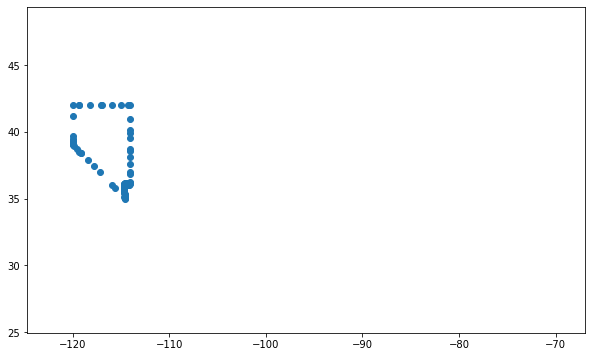

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Tresha\anaconda3

  added / updated specs:
    - pysal


The following NEW packages will be INSTALLED:

  descartes          conda-forge/noarch::descartes-1.1.0-py_4
  palettable         conda-forge/noarch::palettable-3.3.0-py_0
  pysal              conda-forge/noarch::pysal-2.0.0-py_0

The following packages will be SUPERSEDED by a higher-priority channel:

  openssl                                         pkgs/main --> conda-forge


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [67]:
x = []
y = []
for i in us[21].vertices: # Change index of us (0-47) to see vertices' points
    x.append(i[0])
    y.append(i[1])
fig, ax = matplotlib.pyplot.subplots(figsize=(10,6))
matplotlib.pyplot.scatter(x, y)
matplotlib.pyplot.xlim(us.header['BBOX Xmin'] , us.header['BBOX Xmax']) # limits of U.S.
matplotlib.pyplot.ylim(us.header['BBOX Ymin'] , us.header['BBOX Ymax']) # limits of U.S.